Configuring the model


In [ ]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY") # here i configured my api key from .env file

In [117]:
import os
os.environ["GOOGLE_API_KEY"] = "Enter here your google api key" # Remember google api key is limited to daily/monthly limit token 

In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI

model = ChatGoogleGenerativeAI(model='gemini-1.5-flash')
output = model.invoke("hi hello")
print(output.content)




Hi there! How can I help you today?


In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()  # This loads the variables from .env into os.environ

api_key = os.getenv("Enter your deepseek api key here") # google provide limited tokens so i used deepseek api key and model

In [3]:
api_key

In [ ]:
## using openrouter deepseek-r1 model API Key 

from openai import OpenAI

client = OpenAI(
    api_key="Enter your open router website deepseek api key here ",  # this Open Router API key is lifetime free so i used this 
    base_url="https://openrouter.ai/api/v1"
)

response = client.chat.completions.create(
    model="deepseek/deepseek-r1:free",
    messages=[{"role": "user", "content": "hi"}]
)

print(response.choices[0].message.content)


Hello! How can I assist you today?


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

Configuring the embedding model 

In [6]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["HUGGINGFACE_API_KEY"] = os.getenv("HUGGINGFACE_API_KEY") # here i configured my api key from .env file



In [7]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("hi"))

/Users/saicharan/agenticai/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384

LETS TAKE A DATA EMBEDED IT AND STORE IT IN VECTOR DATABASE

In [9]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [10]:
loader=DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader) #here is the directory name data from parent directory

In [11]:
docs=loader.load()

In [12]:
docs

[Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content="Certainly! Here's a well-organized and detailed write-up on **India's economy in 2025** presented in paragraph format:\n\n---\n\n**India’s Economic Landscape in 2025**\n\nIndia stands tall in 2025 as one of the most dynamic and rapidly expanding economies in the world. With a nominal GDP of approximately **USD 4.19 trillion**, India is currently ranked **fourth globally**, just behind the U.S., China, and Germany. When adjusted for purchasing power parity (PPP), India's GDP climbs to **USD 17.65 trillion**, making it the **third-largest economy** worldwide. This robust economic performance is driven by structural reforms, technological advancement, and a favorable demographic dividend.\n\nThe **real GDP growth rate** for the fiscal year 2024–25 is estimated at **6.4%**, slightly lower than the previous year’s impressive 8.2% but still significantly higher than most other major economies. This pace confirms India’s

In [13]:
docs[0].page_content

"Certainly! Here's a well-organized and detailed write-up on **India's economy in 2025** presented in paragraph format:\n\n---\n\n**India’s Economic Landscape in 2025**\n\nIndia stands tall in 2025 as one of the most dynamic and rapidly expanding economies in the world. With a nominal GDP of approximately **USD 4.19 trillion**, India is currently ranked **fourth globally**, just behind the U.S., China, and Germany. When adjusted for purchasing power parity (PPP), India's GDP climbs to **USD 17.65 trillion**, making it the **third-largest economy** worldwide. This robust economic performance is driven by structural reforms, technological advancement, and a favorable demographic dividend.\n\nThe **real GDP growth rate** for the fiscal year 2024–25 is estimated at **6.4%**, slightly lower than the previous year’s impressive 8.2% but still significantly higher than most other major economies. This pace confirms India’s status as the **fastest-growing major economy** globally. Key contribut

In [14]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size = 200,
    chunk_overlap = 50,
)

In [15]:
new_docs=text_splitter.split_documents(documents=docs)

In [16]:
new_docs

[Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content="Certainly! Here's a well-organized and detailed write-up on **India's economy in 2025** presented in paragraph format:\n\n---\n\n**India’s Economic Landscape in 2025**"),
 Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content='India stands tall in 2025 as one of the most dynamic and rapidly expanding economies in the world. With a nominal GDP of approximately **USD 4.19 trillion**, India is currently ranked **fourth'),
 Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content="trillion**, India is currently ranked **fourth globally**, just behind the U.S., China, and Germany. When adjusted for purchasing power parity (PPP), India's GDP climbs to **USD 17.65 trillion**,"),
 Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content="India's GDP climbs to **USD 17.65 trillion**, making it the **third-largest economy** worldwide. This robust economic performance is driven by

In [17]:
doc_string=[doc.page_content for doc in new_docs]

In [18]:
doc_string


["Certainly! Here's a well-organized and detailed write-up on **India's economy in 2025** presented in paragraph format:\n\n---\n\n**India’s Economic Landscape in 2025**",
 'India stands tall in 2025 as one of the most dynamic and rapidly expanding economies in the world. With a nominal GDP of approximately **USD 4.19 trillion**, India is currently ranked **fourth',
 "trillion**, India is currently ranked **fourth globally**, just behind the U.S., China, and Germany. When adjusted for purchasing power parity (PPP), India's GDP climbs to **USD 17.65 trillion**,",
 "India's GDP climbs to **USD 17.65 trillion**, making it the **third-largest economy** worldwide. This robust economic performance is driven by structural reforms, technological advancement, and a",
 'reforms, technological advancement, and a favorable demographic dividend.',
 'The **real GDP growth rate** for the fiscal year 2024–25 is estimated at **6.4%**, slightly lower than the previous year’s impressive 8.2% but still si

In [19]:
len(doc_string)

31

In [20]:
db=Chroma.from_documents(documents=new_docs, embedding=embeddings)

In [21]:
retriver=db.as_retriever(search_kwargs={"k":3})

In [22]:
retriver.invoke("growth of indian economy in 2025")

[Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content='India stands tall in 2025 as one of the most dynamic and rapidly expanding economies in the world. With a nominal GDP of approximately **USD 4.19 trillion**, India is currently ranked **fourth'),
 Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content='In conclusion, India in 2025 is a picture of resilience and optimism. The country’s rapid transformation into a global economic power is being fueled by structural reforms, digital momentum, and a'),
 Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content='by structural reforms, digital momentum, and a strong policy framework. While hurdles remain, India’s trajectory towards becoming a **USD 5 trillion economy by 2027** appears increasingly attainable,')]

USING PYDANTIC FOR CLASS CREATION

In [23]:

import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END

In [24]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [25]:
from langchain.output_parsers import PydanticOutputParser

In [26]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [27]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [28]:
from pydantic import BaseModel, Field

In [29]:
class TopSelectionParser(BaseModel):
    Topic:str=Field(description="Select a topic")
    Reasoning:str=Field(description="reasoning behind Selecting a topic")

In [30]:
from langchain.output_parsers import PydanticOutputParser

In [31]:
parser =PydanticOutputParser(pydantic_object=TopSelectionParser)

In [32]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "Select a topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "reasoning behind Selecting a topic", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [33]:
AgentState = {}


In [34]:
AgentState["messages"]=[]

In [35]:
AgentState

{'messages': []}

In [36]:
AgentState["messages"].append("hello how are you?")

In [37]:
AgentState

{'messages': ['hello how are you?']}

In [38]:
AgentState["messages"].append("how is your health?")

In [39]:
AgentState

{'messages': ['hello how are you?', 'how is your health?']}

In [40]:
AgentState["messages"].append("what is your daily routine?")

In [41]:
AgentState

{'messages': ['hello how are you?',
  'how is your health?',
  'what is your daily routine?']}

In [42]:
AgentState["messages"][-1]

'what is your daily routine?'

In [43]:
AgentState["messages"][0]

'hello how are you?'

AGENT FUNCTIONALITY 🤖

In [44]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [45]:
def function_1(state:AgentState):
    
    question=state["messages"][-1]
    
    print("Question",question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [India,Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt= PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    
    
    chain= prompt | model | parser
    
    response = chain.invoke({"question":question})
    
    print("Parsed response:", response)
    
    return {"messages": [response.Topic]}




In [46]:
state={"messages":["what is a today weather?"]}

In [47]:
state={"messages":["what is a GDP of India??"]}

In [48]:
function_1(state)

Question what is a GDP of India??
Parsed response: Topic='India' Reasoning='The query explicitly asks about the GDP of India.'


{'messages': ['India']}

THIS BELOW BLOCK OF CODE IS FOR REFERENCE TO ABOVE OUTPUT.

In [49]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [50]:
def router(state:AgentState):
    print("-> ROUTER ->")
    
    last_message=state["messages"][-1]
    print("last_message:", last_message)
    
    if "usa" in last_message.lower():
        return "RAG Call"
    else:
        return "LLM Call"



In [52]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [53]:
# RAG Function
def function_2(state:AgentState):
    print("-> RAG Call ->")
    
    question = state["messages"][0]
    
    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",
        
        input_variables=['context', 'question']
    )
    
    rag_chain = (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}
     

  

  

In [54]:
# LLM Function
def function_3(state:AgentState):
    print("-> LLM Call ->")
    question = state["messages"][0]
    
    # Normal LLM call
    complete_query = "Anwer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

In [55]:
from langgraph.graph import StateGraph,END

In [56]:
workflow=StateGraph(AgentState)

In [57]:
workflow.add_node("Supervisor",function_1)

In [58]:
workflow.add_node("RAG",function_2)

In [59]:
workflow.add_node("LLM",function_3)

In [60]:
workflow.set_entry_point("Supervisor")

In [61]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

In [62]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)

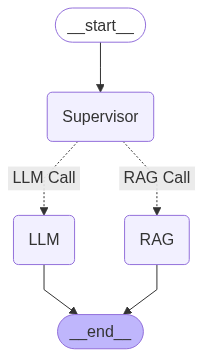

In [63]:
workflow.compile()

In [64]:
app=workflow.compile()

In [65]:
state={"messages":["hi"]}

In [66]:
app.invoke(state)

Question hi
Parsed response: Topic='Not Related' Reasoning="The query 'hi' is a generic greeting and does not relate to India."
-> ROUTER ->
last_message: Not Related
-> LLM Call ->


{'messages': ['hi', 'Not Related', 'Hi there! How can I help you today?']}

In [105]:
state={"messages":["1.what is economy of India? "]}

In [106]:
app.invoke(state)

Question 1.what is economy of India? 
Parsed response: Topic='India' Reasoning='The query explicitly asks about the economy of India.'
-> ROUTER ->
last_message: India
-> LLM Call ->


{'messages': ['1.what is economy of India? ',
  'India',
  'India\'s economy is a complex and rapidly evolving system.  It\'s the world\'s fifth-largest economy by nominal GDP and the third-largest by purchasing power parity (PPP).  Here\'s a breakdown of its key characteristics:\n\n* **Mixed Economy:** India operates a mixed economy, combining elements of both socialism and capitalism.  While there\'s significant private sector participation, the government still plays a substantial role in certain industries and sectors through public sector undertakings (PSUs).\n\n* **Rapid Growth (but uneven):**  India has experienced significant economic growth over the past few decades, fueled by a young and growing workforce, expanding services sector, and increasing foreign investment. However, this growth has been uneven, with disparities between urban and rural areas, and different states.  Poverty and inequality remain significant challenges.\n\n* **Services Sector Dominance:** The services 

In [107]:
state={"messages":["2.can you give me Indian revenue in USD dollars of 2025?"]}

In [108]:
result=app.invoke(state)

Question 2.can you give me Indian revenue in USD dollars of 2025?
Parsed response: Topic='India' Reasoning='The query explicitly asks for Indian revenue data.'
-> ROUTER ->
last_message: India
-> LLM Call ->


In [109]:
state={"messages":["3.can you tell me the industrial growth of world's singapore country?"]}

In [110]:
result=app.invoke(state)

Question 3.can you tell me the industrial growth of world's singapore country?
Parsed response: Topic='Not Related' Reasoning="The query asks about Singapore's industrial growth, which is not related to India."
-> ROUTER ->
last_message: Not Related
-> LLM Call ->


In [116]:
result["messages"][-1]

"Singapore's industrial growth has been remarkable, but it's undergone significant transformations over time.  It's no longer primarily focused on labor-intensive manufacturing.\n\n**Early Stages (Post-Independence):**  Initially, Singapore's industrialization focused on low-cost manufacturing, particularly in textiles, garments, and shipbuilding.  This was fueled by government initiatives to attract foreign investment and develop infrastructure.\n\n**Transition to High-Value Manufacturing and Services:**  Over the decades, Singapore strategically shifted its industrial focus towards higher-value-added activities. This involved:\n\n* **Electronics and Precision Engineering:**  Becoming a major hub for electronics manufacturing, particularly semiconductors and related components.\n* **Petrochemicals and Chemicals:**  Leveraging its port and strategic location to develop a significant petrochemical industry.\n* **Biomedical Sciences:**  Developing a strong biomedical cluster, attracting 